## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')

## Load Dataset

In [13]:
df = pd.read_csv('train.csv')

print('Data Shape',df.shape)
df.head()

Data Shape (175000, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


## Basic Information

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


## Check Missing Values

In [15]:
missing = df.isnull().sum().sort_values(ascending = False)
print('missing values:\n',missing)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print('\nMissing Percentage:\n',missing_percentage.sort_values(ascending = False))

missing values:
 passenger_count          6077
Airport_fee              6077
RatecodeID               6077
store_and_fwd_flag       6077
congestion_surcharge     6077
VendorID                    0
tpep_dropoff_datetime       0
trip_distance               0
tpep_pickup_datetime        0
DOLocationID                0
PULocationID                0
payment_type                0
extra                       0
tolls_amount                0
tip_amount                  0
total_amount                0
improvement_surcharge       0
dtype: int64

Missing Percentage:
 passenger_count          3.472571
Airport_fee              3.472571
RatecodeID               3.472571
store_and_fwd_flag       3.472571
congestion_surcharge     3.472571
VendorID                 0.000000
tpep_dropoff_datetime    0.000000
trip_distance            0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
payment_type             0.000000
extra                    0.000

## Identify Feature Types

In [16]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print('Numerical Columns:\n',num_cols)
print('\nCategorical Columns:\n',cat_cols)

Numerical Columns:
 Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

Categorical Columns:
 Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')


## Convert Datetime Columns

In [17]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])



## Feature Engineering

In [18]:
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

df["pickup_day"] = df["tpep_pickup_datetime"].dt.dayofweek

df[["trip_duration", "pickup_hour", "pickup_day"]].head()

,trip_duration,pickup_hour,pickup_day
0,-45.600000,17,2
1,-63.433333,23,3
2,53.650000,10,4
3,56.866667,13,3
4,18.833333,22,3


## Distribution Plots

Text(0.5, 1.0, 'Passenger Count Distribution')

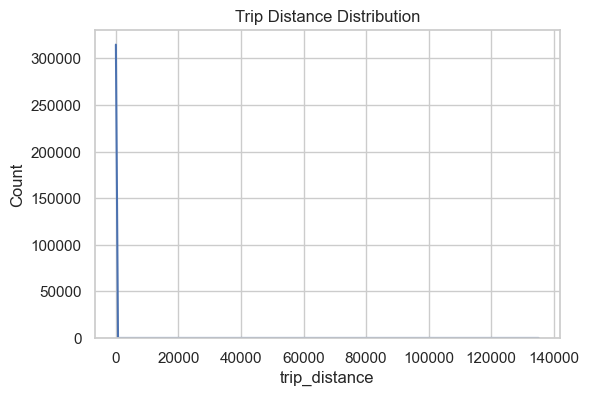

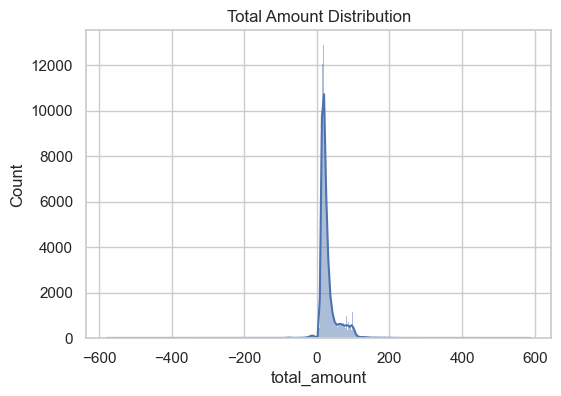

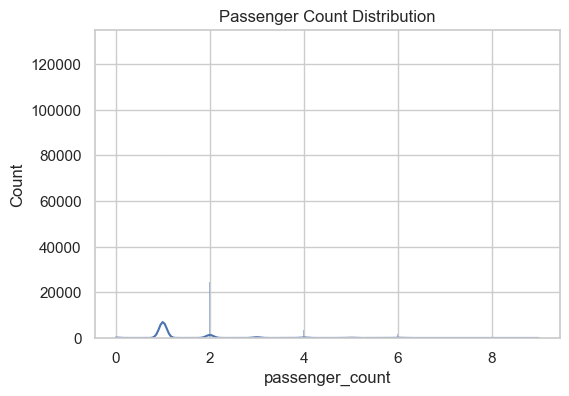

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['trip_distance'],kde = True)
plt.title('Trip Distance Distribution')

plt.figure(figsize=(6,4))
sns.histplot(df['total_amount'],kde = True)
plt.title('Total Amount Distribution')

plt.figure(figsize=(6,4))
sns.histplot(df['passenger_count'],kde = True)
plt.title('Passenger Count Distribution')

## Boxplots

Text(0.5, 1.0, 'Total Amount Boxplot')

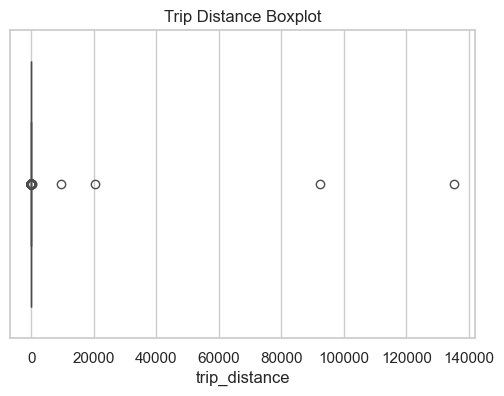

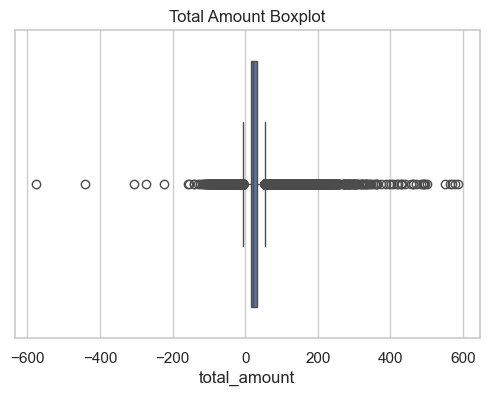

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df['trip_distance'])
plt.title('Trip Distance Boxplot')

plt.figure(figsize=(6,4))
sns.boxplot(x = df['total_amount'])
plt.title('Total Amount Boxplot')

In [25]:
 ### Remove Extreme Outliers

Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['trip_distance']>= lower) & (df['trip_distance']<= upper)]
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (150867, 20)


## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

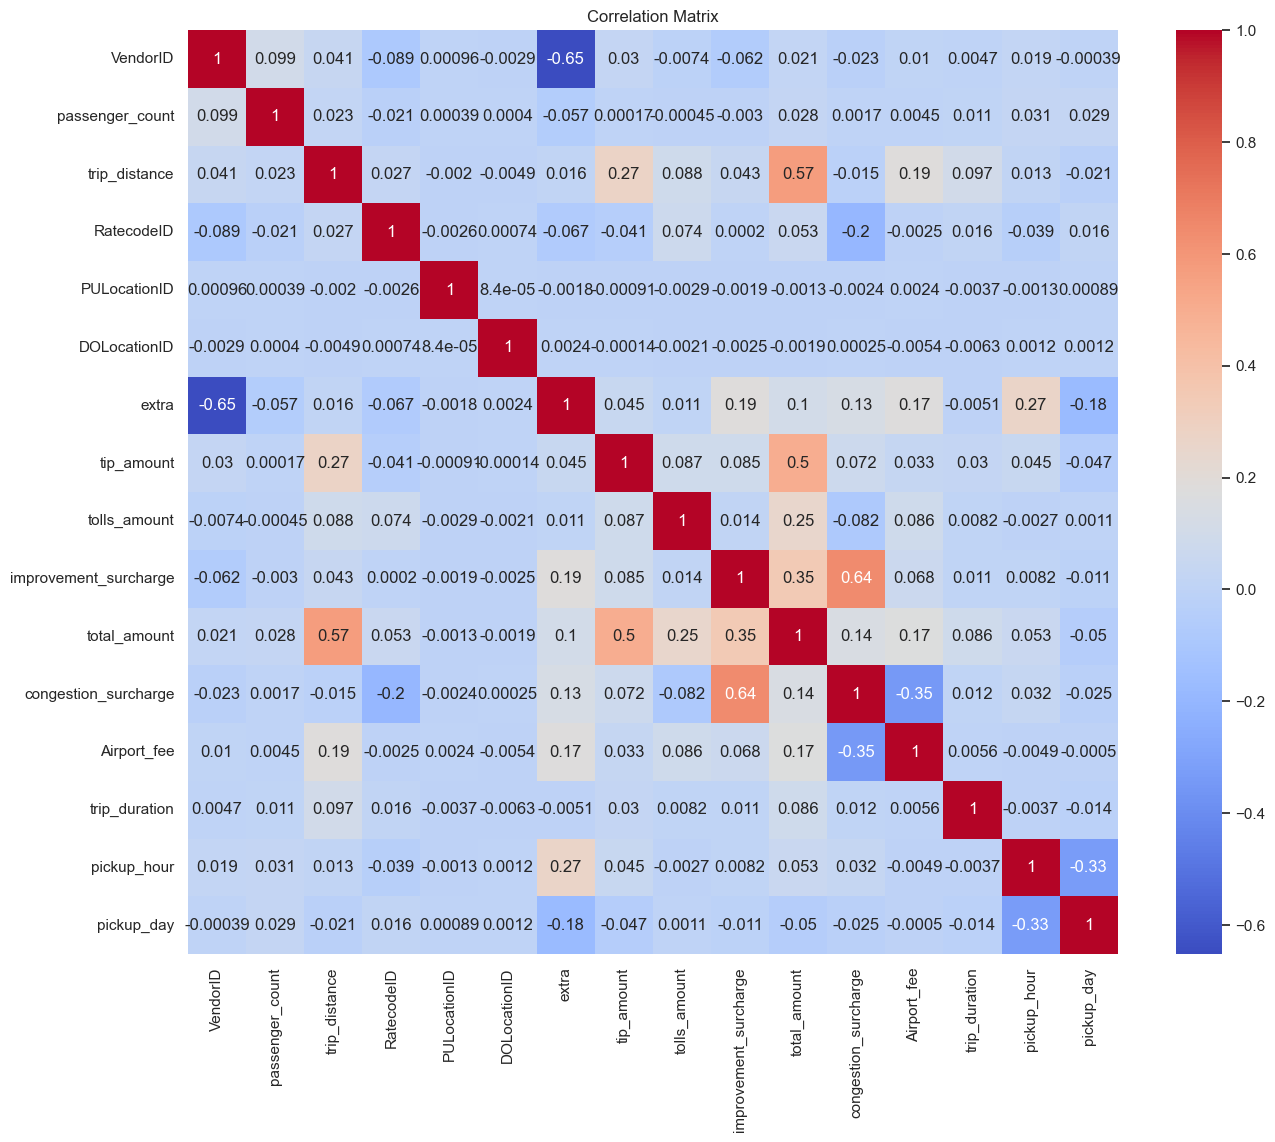

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

## Relationship with Target

Text(0.5, 1.0, 'Trip Distance vs Total Amount')

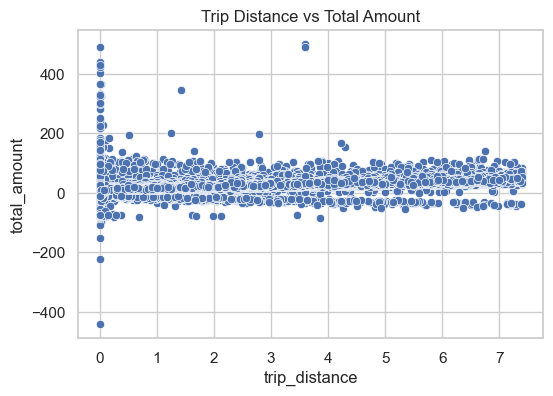

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['trip_distance'],y = df['total_amount'])
plt.title('Trip Distance vs Total Amount')

## INSIGHTS:

### 1. trip_distance has strong positive correlation with total_amount.

### 2. trip_duration also influences fare.

### 3. Data contains outliers in trip_distance and total_amount.
 
### 4. Datetime features provide important predictive power.

### 5. Most trips are short distance rides.
